0.8920237924666745 1.0104899846978516e-10
Not normal
0.8637446416852779 5.32613981772854e-12
Not normal
0.8442400783743066 2.963804168207472e-13
Not normal
0.8748178878875562 2.0154446821701756e-11
Not normal
0.86039745797323 1.8219240636744283e-12
Not normal
0.8527116051865044 1.518118048356778e-12
Not normal
Levene's test result:  25.63794550084472 6.405296325805993e-07
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  32.1424886975608 2.819391504151464e-08
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  31.98729358323687 3.035089218033844e-08
Levene: Reject the null hypothesis (variances are not equal)
Statistics=10912.000, p=0.000
Different distribution (reject H0)
Statistics=8481.500, p=0.000
Different distribution (reject H0)
Statistics=10765.500, p=0.000
Different distribution (reject H0)


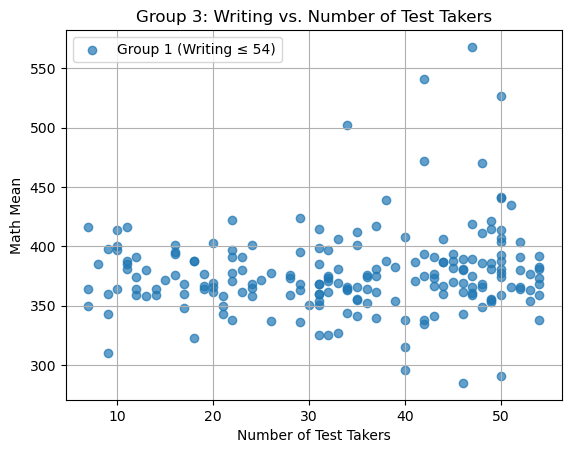

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bartlett, levene, mannwhitneyu
import matplotlib.pyplot as plt
df = pd.read_csv('SAT.csv').dropna()

#break the groups up by the median
group1 = df[df['Number of Test Takers'] <= 54.0 ]['Critical Reading Mean']
group2 = df[df['Number of Test Takers'] > 54.0 ]['Critical Reading Mean']
group3 = df[df['Number of Test Takers'] <= 54.0 ]['Mathematics Mean']
group4 = df[df['Number of Test Takers'] > 54.0 ]['Mathematics Mean']
group5 = df[df['Number of Test Takers'] <= 54.0 ]['Writing Mean']
group6 = df[df['Number of Test Takers'] > 54.0 ]['Writing Mean']
#test each with the shapiro test
statistics, p_value = stats.shapiro(group1)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')
statistics, p_value = stats.shapiro(group2)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group3)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group4)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group5)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group6)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')
#now test with Levene by grouping them together by test
stat, p_levene = levene(group1, group2)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

stat, p_levene = levene(group3, group4)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

stat, p_levene = levene(group5, group6)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")
#since it is not normal pair each group by exam and conduct the whitney test
s, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
s, p = mannwhitneyu(group3, group4)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
s, p = mannwhitneyu(group5, group6)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
#now find the scatterplots to show relations, change the inputs with different groups for different exams
import matplotlib.pyplot as plt


plt.scatter(df[df['Number of Test Takers'] <= 54.0]['Number of Test Takers'],
            group5, alpha=0.7, label='Group 1 (Writing ≤ 54)')
plt.title('Group 3: Writing vs. Number of Test Takers')
plt.xlabel('Number of Test Takers')
plt.ylabel('Math Mean')
plt.legend()
plt.grid(True)
plt.show()




In [2]:
df.head(20)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0
7,01M650,CASCADES HIGH SCHOOL,35.0,411.0,401.0,401.0
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138.0,630.0,608.0,630.0
9,02M047,AMERICAN SIGN LANG ENG DUAL,11.0,405.0,415.0,385.0
10,02M288,FOOD AND FNANCE HIGH SCHOOL,50.0,422.0,412.0,407.0


In [98]:
df['Number of Test Takers'].max()

1047.0

In [104]:
df['Number of Test Takers'].median()

54.0

In [114]:
df[df['Number of Test Takers']== 54.0]

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
38,02M449,VANGUARD HIGH SCHOOL,54.0,367.0,395.0,373.0
55,02M551,New York Harbor High School,54.0,372.0,369.0,368.0
98,05M685,Bread & Rose Intergrated Arts High School,54.0,364.0,378.0,359.0
130,08X305,Pablo Neruda Academy Architecture & World Stud...,54.0,359.0,358.0,338.0
171,10X284,BRONX SCHOOL OF LAW & FINANCE,54.0,404.0,397.0,383.0
203,11X418,Bronx High School for the Visual Arts,54.0,419.0,403.0,392.0
290,17K539,HS FOR SERVICE AND LEARNING AT ERASMUS,54.0,371.0,366.0,381.0


In [149]:
group1 = df[df['Number of Test Takers'] <= 54.0 ]['Critical Reading Mean']
group2 = df[df['Number of Test Takers'] > 54.0 ]['Critical Reading Mean']
group3 = df[df['Number of Test Takers'] <= 54.0 ]['Mathematics Mean']
group4 = df[df['Number of Test Takers'] > 54.0 ]['Mathematics Mean']
group5 = df[df['Number of Test Takers'] <= 54.0 ]['Writing Mean']
group6 = df[df['Number of Test Takers'] > 54.0 ]['Writing Mean']

In [153]:
statistics, p_value = stats.shapiro(group1)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')
statistics, p_value = stats.shapiro(group2)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group3)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group4)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group5)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group6)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

0.8920237924666745 1.0104899846978516e-10
Not normal
0.8637446416852779 5.32613981772854e-12
Not normal
0.8442400783743066 2.963804168207472e-13
Not normal
0.8748178878875562 2.0154446821701756e-11
Not normal
0.86039745797323 1.8219240636744283e-12
Not normal
0.8527116051865044 1.518118048356778e-12
Not normal


In [164]:
stat, p_levene = levene(group1, group2)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

stat, p_levene = levene(group3, group4)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

stat, p_levene = levene(group5, group6)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

Levene's test result:  25.63794550084472 6.405296325805993e-07
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  32.1424886975608 2.819391504151464e-08
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  31.98729358323687 3.035089218033844e-08
Levene: Reject the null hypothesis (variances are not equal)


In [200]:

s, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
s, p = mannwhitneyu(group3, group4)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
s, p = mannwhitneyu(group5, group6)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=10912.000, p=0.000
Different distribution (reject H0)
Statistics=8481.500, p=0.000
Different distribution (reject H0)
Statistics=10765.500, p=0.000
Different distribution (reject H0)


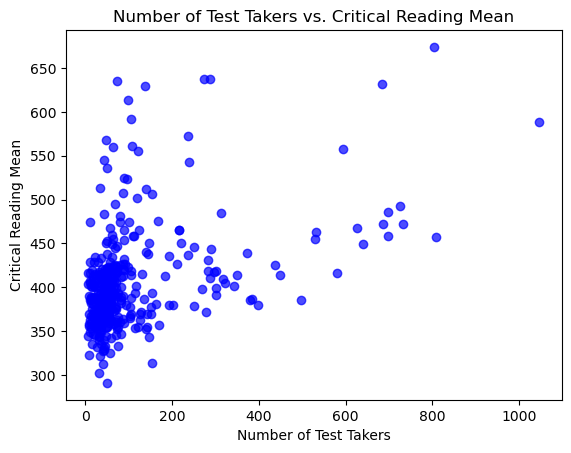

In [190]:
plt.scatter(df['Number of Test Takers'], df['Critical Reading Mean'], color='blue', alpha=0.7)
plt.title('Number of Test Takers vs. Critical Reading Mean')
plt.xlabel('Number of Test Takers')
plt.ylabel('Critical Reading Mean')
plt.show()

In [74]:
plt.scatter(df['Number of Test Takers'], df['Critical Reading Mean'], color='blue', alpha=0.7)
plt.title('Number of Test Takers vs. Critical Reading Mean')
plt.xlabel('Number of Test Takers')
plt.ylabel('Critical Reading Mean')
plt.show()

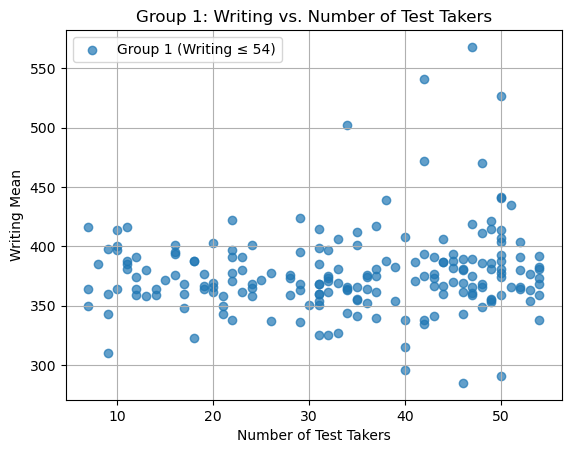

In [222]:
import matplotlib.pyplot as plt


plt.scatter(df[df['Number of Test Takers'] <= 54.0]['Number of Test Takers'],
            group5, alpha=0.7, label='Group 1 (Writing ≤ 54)')
plt.title('Group 3: Writing vs. Number of Test Takers')
plt.xlabel('Number of Test Takers')
plt.ylabel('Math Mean')
plt.legend()
plt.grid(True)
plt.show()





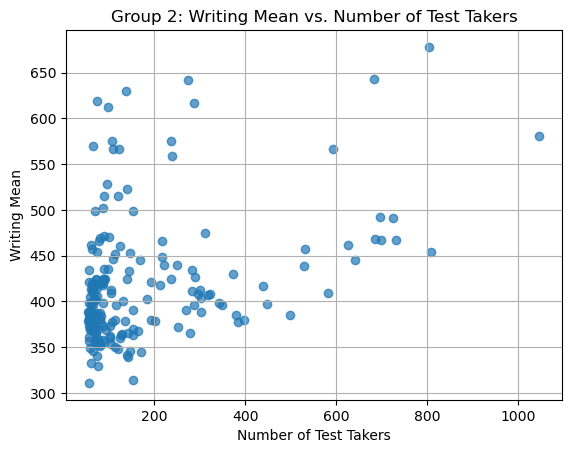

In [224]:
plt.scatter(df[df['Number of Test Takers'] > 54.0]['Number of Test Takers'],
            group6, alpha=0.7, label='Group 2 (Writing > 54)')
plt.title('Group 2: Writing Mean vs. Number of Test Takers')
plt.xlabel('Number of Test Takers')
plt.ylabel('Writing Mean')
plt.grid(True)
plt.show()

0.8920237924666745 1.0104899846978516e-10
Not normal
0.8637446416852779 5.32613981772854e-12
Not normal
0.8442400783743066 2.963804168207472e-13
Not normal
0.8748178878875562 2.0154446821701756e-11
Not normal
0.86039745797323 1.8219240636744283e-12
Not normal
0.8527116051865044 1.518118048356778e-12
Not normal
Levene's test result:  25.63794550084472 6.405296325805993e-07
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  32.1424886975608 2.819391504151464e-08
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  31.98729358323687 3.035089218033844e-08
Levene: Reject the null hypothesis (variances are not equal)
Levene's test result:  0.7222120146802612 0.48612534086544057
Levene: Accept the null hypothesis (equal variances)
Statistics=10912.000, p=0.000
Different distribution (reject H0)
Statistics=8481.500, p=0.000
Different distribution (reject H0)
Statistics=10765.500, p=0.000
Different distribution (reject H0)


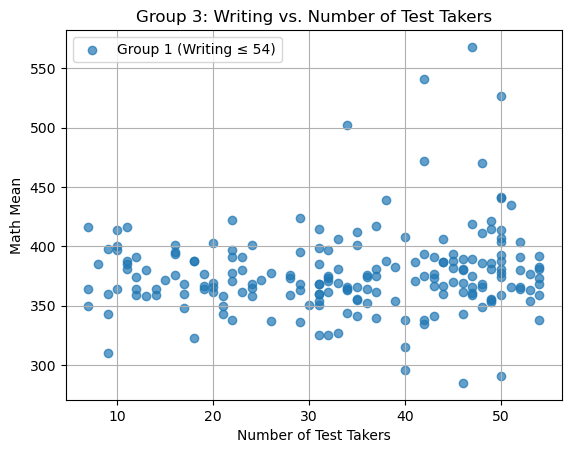

Critical Reading Section:
Spearman's correlation coefficient: 0.402
Samples are correlated (reject H0), p=0.000

Mathematics Section:
Spearman's correlation coefficient: 0.532
Samples are correlated (reject H0), p=0.000

Writing Section:
Spearman's correlation coefficient: 0.412
Samples are correlated (reject H0), p=0.000

Critical Reading Section (Larger Groups):
Spearman's correlation coefficient: 0.308
Samples are correlated (reject H0), p=0.000

Mathematics Section (Larger Groups):
Spearman's correlation coefficient: 0.452
Samples are correlated (reject H0), p=0.000

Writing Section (Larger Groups):
Spearman's correlation coefficient: 0.327
Samples are correlated (reject H0), p=0.000



In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bartlett, levene, mannwhitneyu
import matplotlib.pyplot as plt
df = pd.read_csv('SAT.csv').dropna()

#break the groups up by the median
group1 = df[df['Number of Test Takers'] <= 54.0 ]['Critical Reading Mean']
group2 = df[df['Number of Test Takers'] > 54.0 ]['Critical Reading Mean']
group3 = df[df['Number of Test Takers'] <= 54.0 ]['Mathematics Mean']
group4 = df[df['Number of Test Takers'] > 54.0 ]['Mathematics Mean']
group5 = df[df['Number of Test Takers'] <= 54.0 ]['Writing Mean']
group6 = df[df['Number of Test Takers'] > 54.0 ]['Writing Mean']
#test each with the shapiro test
statistics, p_value = stats.shapiro(group1)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')
statistics, p_value = stats.shapiro(group2)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group3)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group4)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group5)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')

statistics, p_value = stats.shapiro(group6)
print(statistics, p_value)

if (p_value>.05):
    print('Normal')
else:
    print('Not normal')
#now test with Levene by grouping them together by test
stat, p_levene = levene(group1, group2)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

stat, p_levene = levene(group3, group4)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

stat, p_levene = levene(group5, group6)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")


#levene test for larger school scores only
stat, p_levene = levene(group2,group4, group6)
print("Levene's test result: ", stat, p_levene)

if p_levene > 0.05:
    print("Levene: Accept the null hypothesis (equal variances)")
else:
    print("Levene: Reject the null hypothesis (variances are not equal)")

#since it is not normal pair each group by exam and conduct the whitney test
s, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
s, p = mannwhitneyu(group3, group4)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
s, p = mannwhitneyu(group5, group6)
print('Statistics=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
#now find the scatterplots to show relations, change the inputs with different groups for different exams
import matplotlib.pyplot as plt


plt.scatter(df[df['Number of Test Takers'] <= 54.0]['Number of Test Takers'],
            group5, alpha=0.7, label='Group 1 (Writing ≤ 54)')
plt.title('Group 3: Writing vs. Number of Test Takers')
plt.xlabel('Number of Test Takers')
plt.ylabel('Math Mean')
plt.legend()
plt.grid(True)
plt.show()

#correlelation
data1 = df['Number of Test Takers']
data2_reading = df['Critical Reading Mean']
data2_math = df['Mathematics Mean']
data2_writing = df['Writing Mean']

#correlation
for data2, section in [(data2_reading, "Critical Reading"), (data2_math, "Mathematics"), (data2_writing, "Writing")]:
    coef, p = spearmanr(data1, data2)
    print(f"{section} Section:")
    print(f"Spearman's correlation coefficient: {coef:.3f}")
    alpha = 0.05
    if p > alpha:
        print(f"Samples are uncorrelated (fail to reject H0), p={p:.3f}\n")
    else:
        print(f"Samples are correlated (reject H0), p={p:.3f}\n")




larger_groups = df[df['Number of Test Takers'] > 54.0]


data1 = larger_groups['Number of Test Takers']
data2_reading = larger_groups['Critical Reading Mean']
data2_math = larger_groups['Mathematics Mean']
data2_writing = larger_groups['Writing Mean']

# Calculate Spearman's correlation for each pair
for data2, section in [(data2_reading, "Critical Reading"), (data2_math, "Mathematics"), (data2_writing, "Writing")]:
    coef, p = spearmanr(data1, data2)
    print(f"{section} Section (Larger Groups):")
    print(f"Spearman's correlation coefficient: {coef:.3f}")
    alpha = 0.05
    if p > alpha:
        print(f"Samples are uncorrelated (fail to reject H0), p={p:.3f}\n")
    else:
        print(f"Samples are correlated (reject H0), p={p:.3f}\n")